In [32]:
import re
%matplotlib notebook
import matplotlib.pyplot as plt



In [33]:
def get_data(lines):
    
    mean = lambda x: sum(x) / len(x)
    
    losses = {}
    accs = {}
    eval_losses = {}
    eval_accs = {}
    
    last_batch = 0
    for line in lines:
        line = line.split(' ')
        if line[0].startswith('Batch'):
            batch_num = line[0].replace('Batch[', '')
            batch_num = batch_num.replace("]", "")
            batch_num = int(batch_num)
            loss = float(line[3])
            acc = float(re.sub('%.*', '', line[6]))
            if batch_num not in losses:
                losses[batch_num] = []
            if batch_num not in accs:
                accs[batch_num] = []
            losses[batch_num].append(loss)
            accs[batch_num].append(acc)
            last_batch = batch_num
        elif ' '.join(line).startswith("Evaluation - loss"):
            batch_num = last_batch
            loss = float(line[3])
            acc = float(re.sub('%.*', '', line[6]))
            if batch_num not in eval_losses:
                eval_losses[batch_num] = []
            if batch_num not in eval_accs:
                eval_accs[batch_num] = []
            eval_losses[batch_num].append(loss)
            eval_accs[batch_num].append(acc)
    
    batch = []
    evals = []
    assert(len(losses) == len(accs))
    assert(len(eval_losses) == len(eval_accs))
    
    for batch_num in losses:
        batch.append((batch_num, mean(losses[batch_num]), mean(accs[batch_num])))
        
    for batch_num in eval_losses:
        evals.append((batch_num, mean(eval_losses[batch_num]), mean(eval_accs[batch_num])))
    
    return batch, evals


In [34]:
# filenames = [
#     'hypertune/separatedScored.elmo_src_para_dist.0.5/all_kernels.log',
#     'hypertune/separatedScored.elmo_src_para_dist.0.5/all_lr_0.1.log',
#     'hypertune/separatedScored.elmo_src_para_dist.0.5/all_lr_0.5.log',
#     'hypertune/separatedScored.elmo_src_para_dist.0.5/all_lr_1.0.log',
#     'hypertune/separatedScored.elmo_src_para_dist.0.5/all_num_600.log',
#     'hypertune/separatedScored.elmo_src_para_dist.0.5/char_kernel.log',
#     'hypertune/separatedScored.elmo_src_para_dist.0.5/char_num_600.log',
#     'hypertune/separatedScored.elmo_src_para_dist.0.5/word_kernels.log',
#     'hypertune/separatedScored.elmo_src_para_dist.0.5/word_num_600.log'
#     ]

filenames = [
    'hypertune/separatedScored.ng_orig_para.0.5/all_kernels.log',
    'hypertune/separatedScored.ng_orig_para.0.5/all_lr_0.1.log',
    'hypertune/separatedScored.ng_orig_para.0.5/all_lr_0.5.log',
    'hypertune/separatedScored.ng_orig_para.0.5/all_lr_1.0.log',
    'hypertune/separatedScored.ng_orig_para.0.5/all_num_600.log',
    'hypertune/separatedScored.ng_orig_para.0.5/char_kernel.log',
    'hypertune/separatedScored.ng_orig_para.0.5/char_num_600.log',
    'hypertune/separatedScored.ng_orig_para.0.5/word_kernels.log',
    'hypertune/separatedScored.ng_orig_para.0.5/word_num_600.log'
    ]


def add_line(filename):
    data = open(filename, 'r')
    batch, evals = get_data(data.readlines())
    bats = [bat[0] for bat in batch]
    loss = [bat[1] for bat in batch]
    acc = [bat[2] for bat in batch]
    data.close()
    return bats, loss, acc

colors = [
          'tab:blue', 
          'tab:orange', 
          'tab:green', 
          'tab:red', 
          'tab:purple', 
          'tab:brown', 
          'tab:pink', 
          'tab:gray', 
          'tab:olive', 
          ]

# for files in filenames:
# bats1, loss1, acc1 = add_line(filenames[0])
# bats2, loss2, acc2 = add_line(filenames[9])


<IPython.core.display.Javascript object>


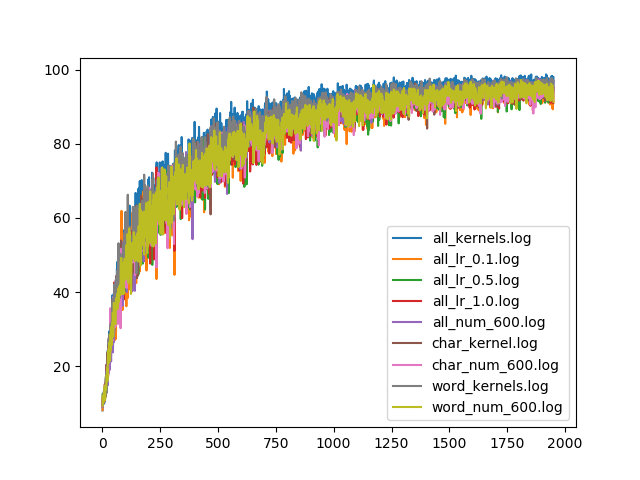

<IPython.core.display.Javascript object>


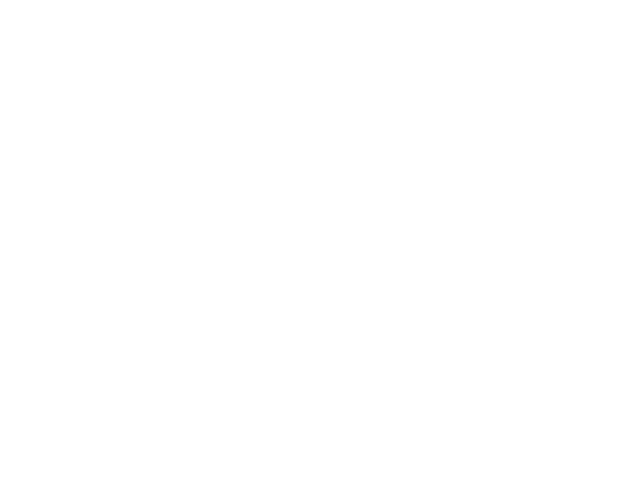

In [35]:
for fname, color in zip(filenames, colors):
    label = fname.split('/')[-1]
    batch, loss, acc = add_line(fname)
    plt.plot(batch, acc, color=color, label=label)

plt.legend()
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# plt.savefig('test.pdf')
plt.show()    

In [96]:
plt.close()